In [1]:
import numpy as np

# Warmup

To get familiar with $\texttt{numpy}$ synthax we propose a few warm up exercises.
Try to be as $\texttt{python}$ic as possible when solving them: for each function, you should aim at $\textbf{ one line long implementations}.$

# Warmup 0

Write function $\texttt{rescale}$, which takes as input array $x \in \mathbb R ^ {N \times M}$ and scalars $a<b \in \mathbb R$, and returns output array $y \in \mathbb [a,b] ^ {N \times M} : y = (b-a) \frac{(x - \min x)}{\max x - \min x} + a  $  . 

In [2]:
def rescale(input,a,b):
    return (b - a) * (x - x.min())/(x.max() - x.min()) + a

Test your code:

In [3]:
x = 2*np.random.rand(3,2) - 1
a = 1
b = 3
y = rescale(x,a,b)

print("Input:")
print(x)
print("Output:")
print(y)
print("in:")
print(a,b)

assert(np.abs(np.min(y) - a) < 1e-6 )
assert(np.abs(np.max(y) - b) < 1e-6 )

# Warmup 1

Write function $\texttt{find_closest}$,  which given  scalar $u \in \mathbb R$ and input array $x \in \mathbb R ^ {N \times M}$, returns the closest element to the scalar in the array $x_{i^*,j^*} : (i^*,j^*)=\text{argmin}_{i,j} | x_{i,j} - u | $. 

In [4]:
def find_closest(x, u):
    return x[np.argmin(abs((x - u)))]

test your code:

In [5]:
x = np.arange(20)
u = np.random.uniform(0,20)
x_ij = find_closest(x, u)

print("Closest to u:")
print(u)
print( "in array:")
print(x)
print("is:")
print(x_ij)
      
assert(x_ij == x[int(round(u))] )

Closest to u:
3.1310998463702044
in array:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
is:
3


# Warmup 2

Write function $\texttt{find_largest_n}$, taking as input array $x \in \mathbb R ^ {N}$  and integer $n < N$ and returning the $n$ largest numbers in the array. 

In [6]:
def find_largest_n(x, n):
    return np.sort(x)[-n:][::-1]

You can test your code by running:

In [7]:
x = np.arange(100)
n = 10
y = find_largest_n(x, n)
print("Input:")
print(x)
print ("largest", n)
print(y)
assert(np.sum(y - (90 +np.arange(10))) == 0 )

Input:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
largest 10
[99 98 97 96 95 94 93 92 91 90]


# Basic Slicing and Indexing

Basic slicing extends $\texttt{Python}$’s basic concept of slicing to N dimensions. Basic slicing occurs when obj is a slice object (constructed by start:stop:step notation inside of brackets), an integer, or a tuple of slice objects and integers. Consider the following example:

In [8]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = x[1:7:2]
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5]


Now that you know what it's all about, try implementing function $\texttt{mirror}$ which mirrors a gray scale image $x \in \mathbb R ^ {N \times N}$ along the $y$ axis? You should implement this in  1 line of code.

In [9]:
def mirror(x):
    return x[::-1]

Test it out by running:

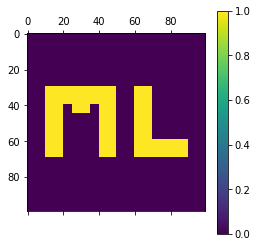

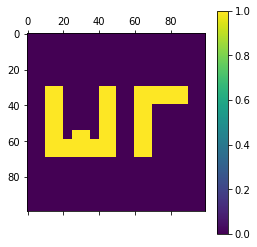

In [10]:
try:
    import matplotlib.pyplot as plt
    %matplotlib inline  
except:
    print("You have to install matplotlib first.")

x = np.zeros((100,100))

x[30:70,10:20]=1
x[30:40,20:40]=1
x[30:45,25:35]=1
x[30:70,40:50]=1

x[30:70,60:70]=1
x[60:70,70:90]=1
y = mirror(x)

plt.matshow(x)
plt.colorbar()
plt.show()

plt.matshow(y)
plt.colorbar()
plt.show()

# More indexing: swapping

Swapping two numbers is a simple operation, that can be implemented as:

In [11]:
def swap(x,y):
    temp = x
    x = y
    y = temp
    return x,y

Can you now write a function $\texttt{swap_in_place}$ that swaps two numbers in place, i.e. without using a temporary variable?  My implementation is 3 lines long.

In [12]:
def swap_in_place(x,y):
    y = y + x
    x = y - x  # x = (y + x) - x = y
    y = y - x  # y = (y + x) - y = x
    return (x, y)

To test it:

In [13]:
x = np.array([10])
y = np.array([50])
x_s, y_s = swap_in_place(x,y)
print(x,y)
print(x_s,y_s)
assert(x_s == y)
assert(y_s == x)

[10] [50]
[50] [10]


Now write a function that swaps two columns $(i,j)$ of a $\texttt{numpy}$ array $x \in \mathbb R ^{N \times M}$ using an temporary variable ($\texttt{swap_cols(x,i,j)}$), and one  that does the swapping in place ($\texttt{swap_in_place_cols(x,i,j)}$).
What do you notice?

In [14]:
def swap_cols(x,i,j):
    col = np.copy(x.T[i])
    x.T[i] = x.T[j]
    x.T[j] = col
    return x

def swap_in_place_cols(x,i,j):
    x.T[[i, j]] = x.T[[j, i]]
    return x

In [15]:
# doesn't work
x = np.random.rand(3,3)
print("Input:")
print(x)
x = swap_cols(x,0,1)
print("Swapped:")
print(x)

# works
x = np.random.rand(3,3)
print("Input:")
print(x)
print("Swapped:")
x = swap_in_place_cols(x,0,1)
print(x)

Input:
[[0.34581946 0.75852341 0.88929214]
 [0.99528122 0.858479   0.28079775]
 [0.78768839 0.68933939 0.92018321]]
Swapped:
[[0.75852341 0.34581946 0.88929214]
 [0.858479   0.99528122 0.28079775]
 [0.68933939 0.78768839 0.92018321]]
Input:
[[0.33574962 0.41291362 0.00558496]
 [0.96623114 0.12811682 0.53343432]
 [0.62893655 0.63652372 0.32615986]]
Swapped:
[[0.41291362 0.33574962 0.00558496]
 [0.12811682 0.96623114 0.53343432]
 [0.63652372 0.62893655 0.32615986]]


# Broadcasting

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html

Here's an example of broadcasting:

In [16]:
a = np.arange(3)
b = np.arange(3)

print("a shape:", a.shape)
print("b shape:", b.shape)
print(a+b)

a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print("a shape:", a.shape)
print("b shape:", b.shape)
print(a+b)

a shape: (3,)
b shape: (3,)
[0 2 4]
a shape: (3,)
b shape: (3, 1)
[[0 1 2]
 [1 2 3]
 [2 3 4]]


Start off writing function $\texttt{whiten}$, taking as input array $x \in \mathbb R ^ {N \times M}$ and returning output array $y \in \mathbb R ^ {N \times M}$  such that $\mathbb E \, y= 0$ and $\text {Var} \, y = 1$ .

In [17]:
def whiten(x):
    return (x - np.mean(x))/np.sqrt(np.var(x))

In [18]:
x = 2*np.random.rand(3,2) - 1
y = whiten(x)

print("Input:")
print(x)
print("Output:")
print(y)
print("Mean:")
print(np.mean(y))
print("Variance:")
print(np.var(y))


assert(np.abs(np.mean(y) - 0.) < 1e-6 )
assert(np.abs(np.var(y) - 1.) < 1e-6 )

Input:
[[-0.65589552  0.90023969]
 [ 0.773847    0.52859828]
 [ 0.79230263  0.06335762]]
Output:
[[-1.93462958  0.91544555]
 [ 0.68395626  0.23478108]
 [ 0.71775789 -0.61731121]]
Mean:
-3.700743415417188e-17
Variance:
0.9999999999999999


What if you want to do the same operation columnwise this time, i.e. $\mu _ i = \mathbb E_j x_{i,j} = 0 \, \, \forall i$? Once again, aim for one line long implementations. If you are stuck, think about broadcasting and look up the doc of $\texttt{np.mean}$ on https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html

In [19]:
def whiten_columnwise(x):
    return (x - np.mean(x, axis=1)[:, np.newaxis])/(np.sqrt(np.var(x, axis=1)[:, np.newaxis]))

In [20]:
x = 2*np.random.rand(4,3) - 1
y = whiten_columnwise(x)

print("Input with shape :", x.shape)
print(x)
print("Input mean with shape :", np.mean(x,axis = 1,keepdims = True).shape)
print(np.mean(x,axis = 1,keepdims = True))
print("Input variance with shape :", np.mean(x,axis =1,keepdims = True).shape)
print(np.var(x,axis = 1,keepdims = True))
print("Output with shape :", y.shape)
print(y)
print("Output mean with shape :", np.mean(y,axis = 1,keepdims = True).shape)
print(np.mean(y,axis = 1,keepdims = True))
print("Output variance with shape :", np.mean(y,1,keepdims = True).shape)
print(np.var(y,axis = 1,keepdims = True))

Input with shape : (4, 3)
[[ 0.31221444 -0.69733021 -0.55196265]
 [ 0.66944605  0.25070776 -0.24443053]
 [ 0.480239   -0.33230816  0.31358655]
 [ 0.52405727  0.53933025  0.83159401]]
Input mean with shape : (4, 1)
[[-0.31235948]
 [ 0.22524109]
 [ 0.15383913]
 [ 0.63166051]]
Input variance with shape : (4, 1)
[[0.19856824]
 [0.13951934]
 [0.12279843]
 [0.02002558]]
Output with shape : (4, 3)
[[ 1.40161568 -0.8639186  -0.53769708]
 [ 1.18923091  0.06817967 -1.25741058]
 [ 0.93143717 -1.38730341  0.45586624]
 [-0.76038371 -0.65245642  1.41284013]]
Output mean with shape : (4, 1)
[[-3.70074342e-17]
 [-7.40148683e-17]
 [-5.55111512e-17]
 [ 2.22044605e-16]]
Output variance with shape : (4, 1)
[[1.]
 [1.]
 [1.]
 [1.]]
